In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [29]:
df=pd.read_table('C:\\Users\\Hajji\\Desktop\\Animal Data\\anage_data.txt') 

In [30]:
df.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In [31]:
df.shape

(4219, 31)

In [32]:
d1={'HAGRID':'Hagrid', 'Common name':'Common_name', 'Female maturity (days)':'Female_maturity_days',
       'Male maturity (days)':'Male_maturity_days', 'Gestation/Incubation (days)':'Gestation_Incubation_days',
       'Weaning (days)':'Weaning_days',
       'Litter/Clutch size':'Litter_Clutch_size', 'Litters/Clutches per year':'Litters_Clutches_per_year',
       'Inter-litter/Interbirth interval':'Inter_litter_Interbirth_interval', 'Birth weight (g)':'Birth_weight_g',
       'Weaning weight (g)':'Weaning_weight_g', 'Adult weight (g)':'Adult_weight_g', 'Growth rate (1/days)':'Growth_rate_1_days_',
       'Maximum longevity (yrs)':'Maximum_longevity_yrs', 'Specimen origin':'Specimen_origin', 'Sample size':'Sample_size',
       'Data quality':'Data_quality', 'IMR (per yr)':'IMR_per_yr', 'MRDT (yrs)':'MRDT_yrs', 'Metabolic rate (W)':'Metabolic_rate_W',
       'Body mass (g)':'Body_mass_g', 'Temperature (K)':'Temperature_K'}

In [33]:
df.rename(columns=d1,inplace=True)
mam=df.loc[df.Class=='Mammalia']
mam.head()

,Hagrid,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
1530,1542,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,365.0,...,671,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85,"36,148,434,455,542,610,671,678,680,731,1030,1103"
1531,1543,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,NaN,...,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95,"36,420,434,613,678"
1532,1544,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,35.0,...,671,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15,"36,420,434,436,455,542,610,671,678,680"
1533,1545,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,dobsoni,Dobson's shrew tenrec,669.0,...,434,captivity,small,acceptable,NaN,NaN,0.315,44.6,304.05,"36,420,434,455,610,678,731"
1534,1546,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,talazaci,Talazac's shrew tenrec,639.0,...,434,captivity,small,acceptable,NaN,NaN,0.243,44.0,303.95,"36,420,434,455,731"


In [34]:
mam.drop(columns=['Hagrid','Kingdom','Phylum'],inplace=True)
mam.head()

,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
1530,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,365.0,365.0,55.0,29.0,...,671,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85,"36,148,434,455,542,610,671,678,680,731,1030,1103"
1531,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,NaN,NaN,63.0,37.0,...,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95,"36,420,434,613,678"
1532,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,35.0,NaN,59.0,21.0,...,671,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15,"36,420,434,436,455,542,610,671,678,680"
1533,Mammalia,Afrosoricida,Tenrecidae,Microgale,dobsoni,Dobson's shrew tenrec,669.0,669.0,61.0,29.0,...,434,captivity,small,acceptable,NaN,NaN,0.315,44.6,304.05,"36,420,434,455,610,678,731"
1534,Mammalia,Afrosoricida,Tenrecidae,Microgale,talazaci,Talazac's shrew tenrec,639.0,639.0,61.0,29.0,...,434,captivity,small,acceptable,NaN,NaN,0.243,44.0,303.95,"36,420,434,455,731"


In [35]:
mam.Order.value_counts().head(10)

Rodentia           358
Carnivora          205
Primates           174
Artiodactyla       172
Chiroptera          96
Diprotodontia       72
Cetacea             45
Dasyuromorphia      38
Soricomorpha        33
Didelphimorphia     20
Name: Order, dtype: int64

In [41]:
from IPython.display import Image

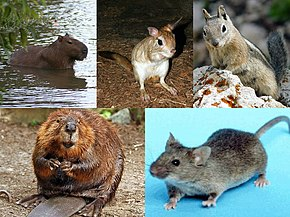

In [49]:
Image(filename=("C:\\Users\\Hajji\\Desktop\\Animal Data\\images\\Rodentia.jpg"), width = 300, height= 400)

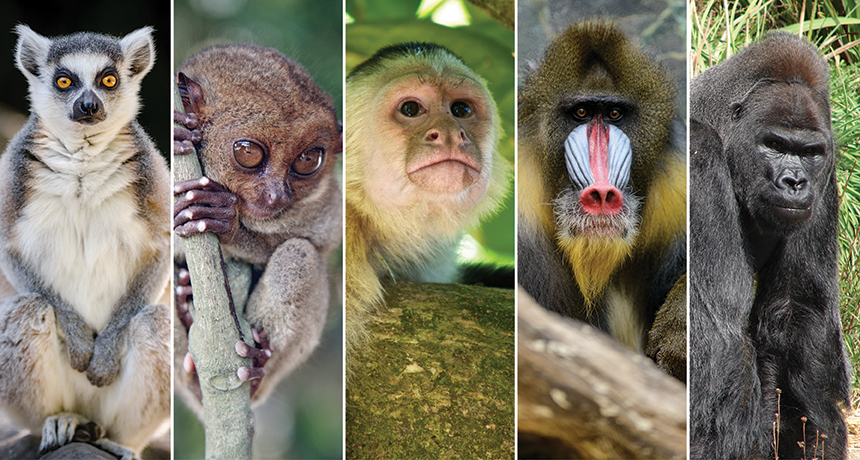

In [52]:
Image(filename=("C:\\Users\\Hajji\\Desktop\\Animal Data\\images\\Primates.jpg"))


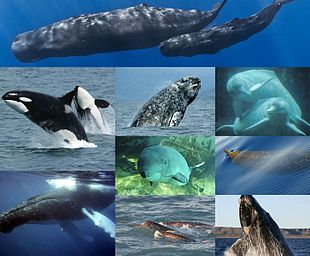

In [53]:
Image(filename=("C:\\Users\\Hajji\\Desktop\\Animal Data\\images\\Cetacea.jpg"))


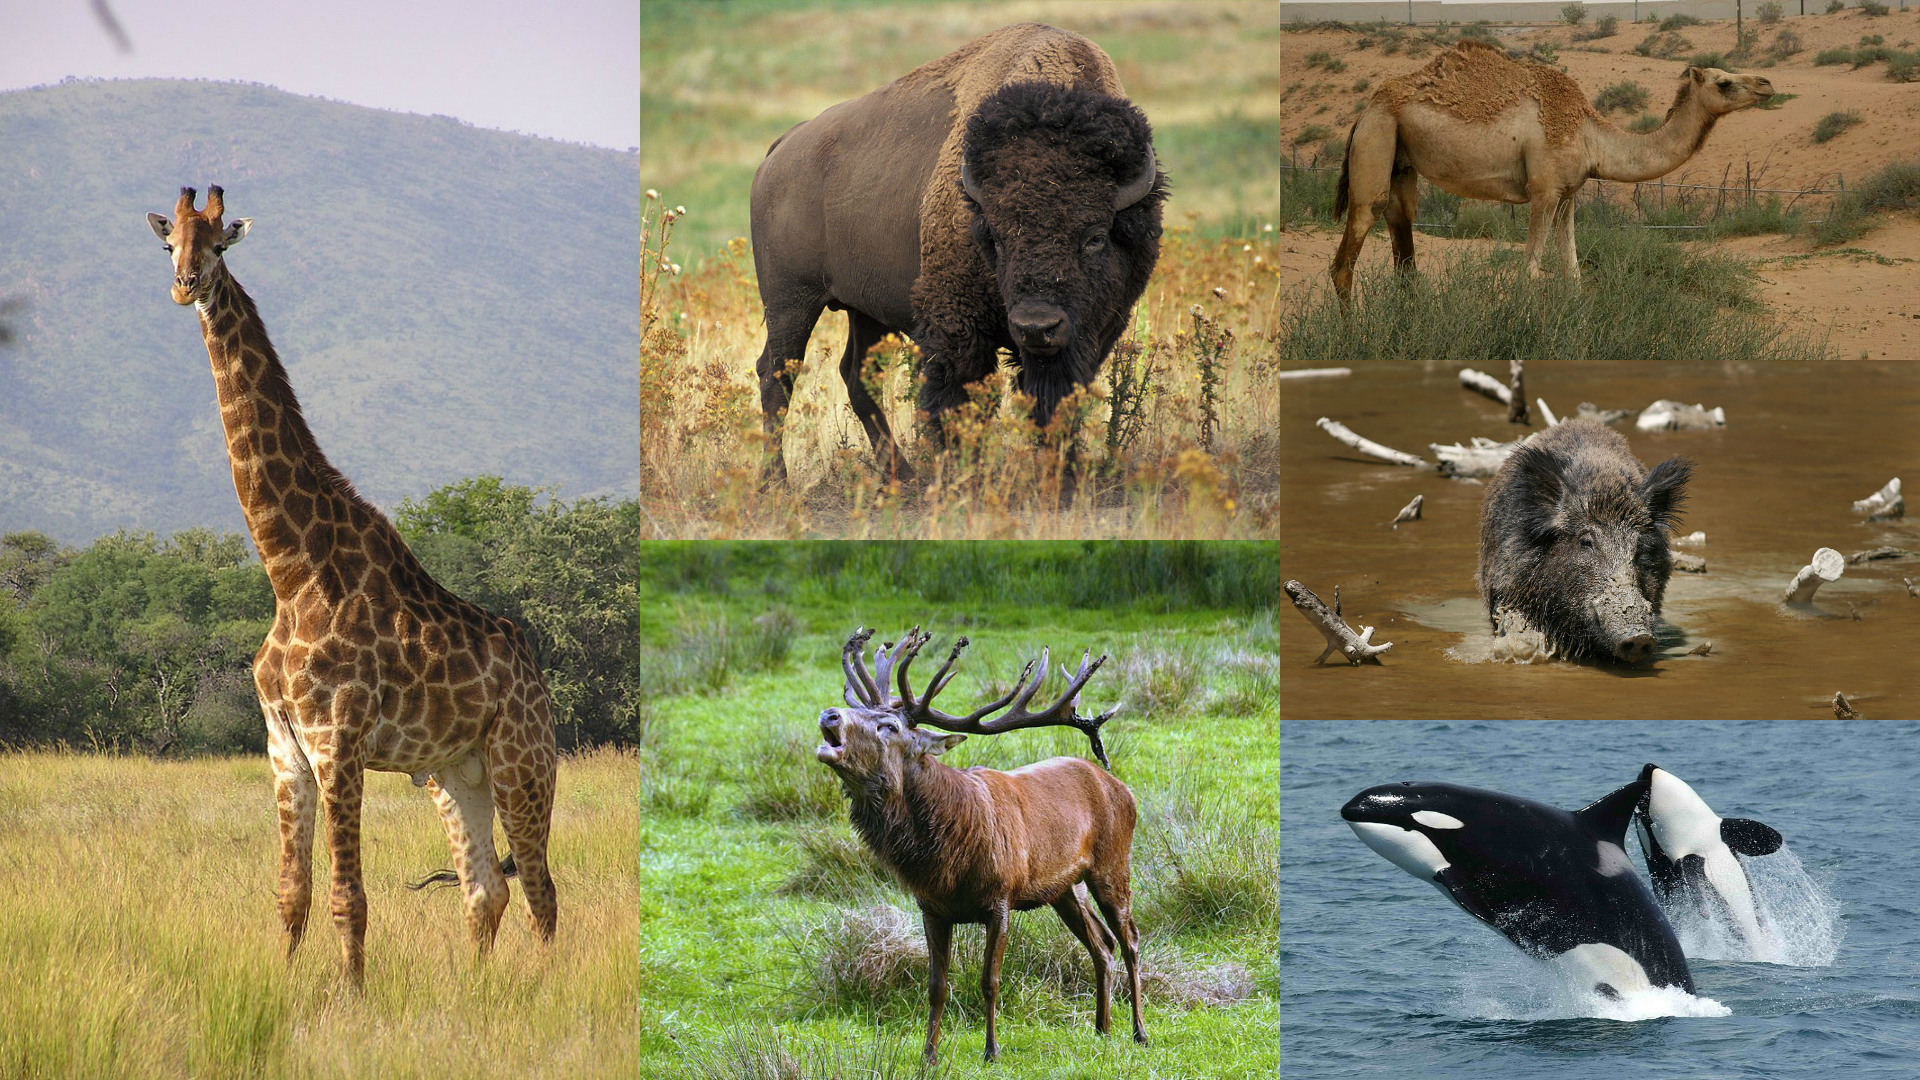

In [56]:
 Image(filename=("C:\\Users\\Hajji\\Desktop\\Animal Data\\images\\Artiodactyla.jpg"))



<BarContainer object of 28 artists>

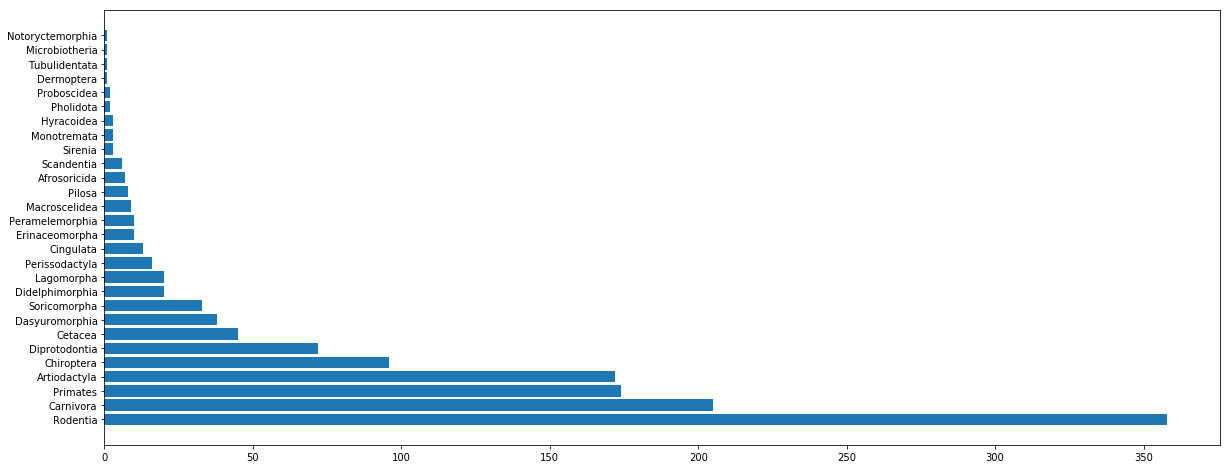

In [57]:
# Distribution of  'Order'
plt.figure(figsize=(20,8))
plt.barh(mam.Order.value_counts().index,mam.Order.value_counts())

In [ ]:
apes=mam.loc[mam.Family=='Hominidae']

In [87]:
apes

,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
2406,Mammalia,Primates,Hominidae,Gorilla,gorilla,Gorilla,2829.0,4015.0,256.0,834.0,...,1151,captivity,large,acceptable,NaN,NaN,NaN,NaN,308.65,"59,341,342,434,436,455,467,610,671,679,680,681..."
2407,Mammalia,Primates,Hominidae,Homo,sapiens,Human,4745.0,5110.0,280.0,639.0,...,29,captivity,huge,high,0.0002,8.0,82.78,70000.0,310.15,"2,13,14,29,30,31,36,58,59,65,75,76,110,111,121..."
2408,Mammalia,Primates,Hominidae,Pan,paniscus,Pygmy chimpanzee or bonobo,3194.0,NaN,232.0,635.0,...,671,captivity,tiny,acceptable,NaN,NaN,NaN,NaN,NaN,"108,256,323,324,434,436,455,463,467,569,590,67..."
2409,Mammalia,Primates,Hominidae,Pan,troglodytes,Chimpanzee,3376.0,2920.0,229.0,1111.0,...,671,captivity,large,acceptable,0.0400,8.0,NaN,NaN,308.85,"8,59,72,73,234,235,236,237,238,239,256,323,434..."
2410,Mammalia,Primates,Hominidae,Pongo,pygmaeus,Orangutan,2555.0,2555.0,249.0,1003.0,...,671,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,"59,75,108,164,214,215,434,436,455,467,610,671,..."


In [88]:
L2=apes.Common_name
L2[2408 ]='bonobo'

Text(0.5,1,'Birth Weight')

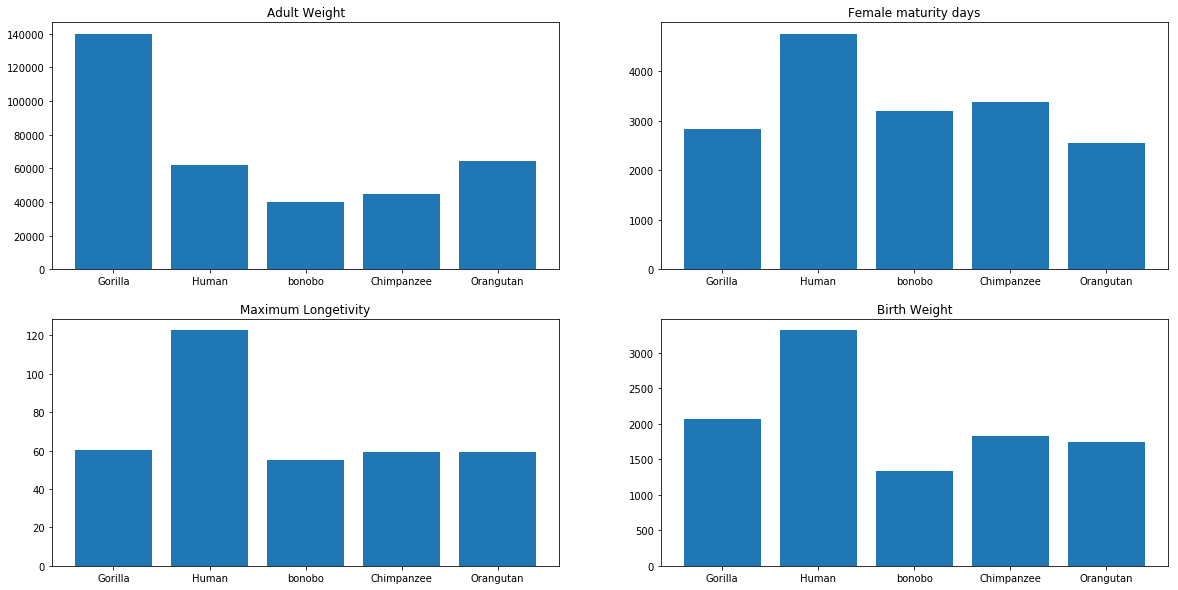

In [89]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(L2,apes.Adult_weight_g)
plt.title('Adult Weight')
plt.subplot(222)
plt.bar(L2,apes.Female_maturity_days)
plt.title('Female maturity days')
plt.subplot(223)
plt.bar(L2,apes.Maximum_longevity_yrs)
plt.title('Maximum Longetivity')
plt.subplot(224)
plt.bar(L2,apes.Birth_weight_g)
plt.title('Birth Weight')

In [86]:
mam.describe()

,Female_maturity_days,Gestation_Incubation_days,Weaning_days,Litter_Clutch_size,Litters_Clutches_per_year,Birth_weight_g,Adult_weight_g,Maximum_longevity_yrs,Temperature_K
count,860.000000,1024.000000,810.000000,1232.000000,813.000000,8.490000e+02,1.310000e+03,1012.000000,457.000000
mean,685.967442,121.554688,143.759259,2.539866,1.569459,1.656514e+04,4.618394e+05,19.826581,309.730306
std,772.129778,107.963242,165.824986,2.050873,1.204807,1.287223e+05,5.473929e+06,15.551026,1.756006
min,24.000000,10.000000,7.000000,1.000000,0.100000,4.000000e-03,2.100000e+00,2.100000,303.850000
25%,243.000000,31.000000,36.000000,1.000000,1.000000,4.460000e+00,1.050000e+02,9.375000,308.700000
50%,391.500000,76.500000,77.000000,2.000000,1.000000,5.550000e+01,1.399300e+03,17.150000,309.850000
75%,803.750000,180.000000,182.750000,3.525000,2.000000,7.000000e+02,1.157500e+04,25.425000,311.150000
max,8212.000000,670.000000,1111.000000,22.200000,10.000000,2.000000e+06,1.360000e+08,211.000000,313.850000


In [62]:
mam.isnull().sum()

Class                                  0
Order                                  0
Family                                 0
Genus                                  0
Species                                0
Common_name                            0
Female_maturity_days                 469
Male_maturity_days                   755
Gestation_Incubation_days            305
Weaning_days                         519
Litter_Clutch_size                    97
Litters_Clutches_per_year            516
Inter_litter_Interbirth_interval     673
Birth_weight_g                       480
Weaning_weight_g                     924
Adult_weight_g                        19
Growth_rate_1_days_                 1079
Maximum_longevity_yrs                317
Source                               319
Specimen_origin                        0
Sample_size                            0
Data_quality                           0
IMR_per_yr                          1314
MRDT_yrs                            1312
Metabolic_rate_W

Text(0.5,1,'percentage missing data')

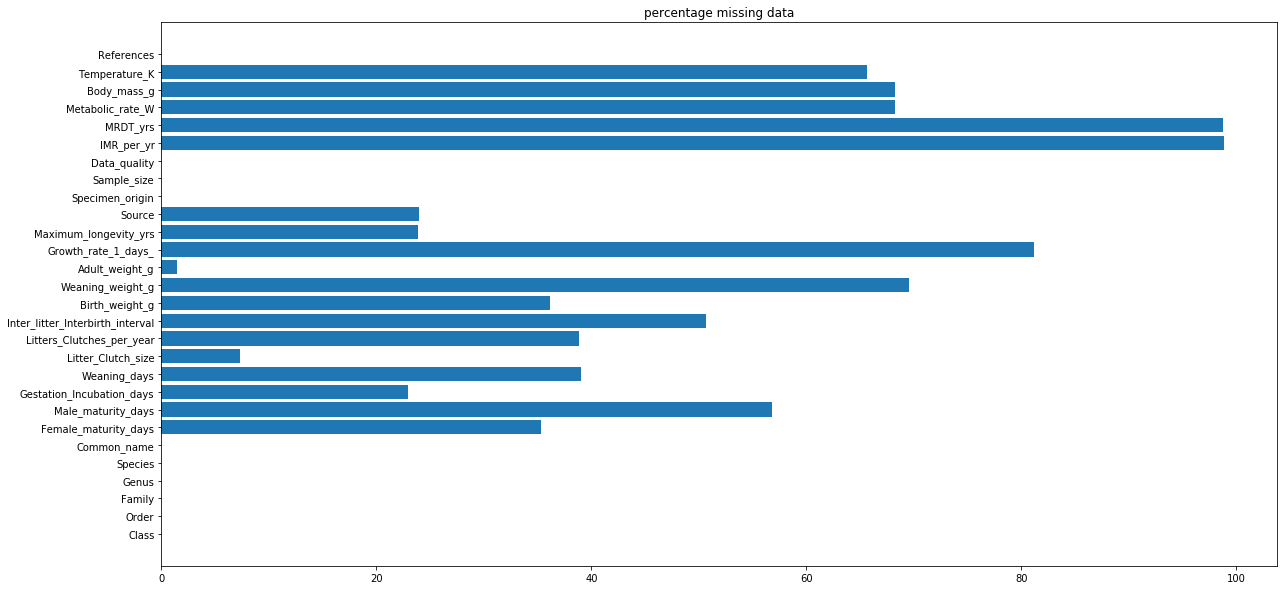

In [63]:
plt.figure(figsize=(20,10))
plt.barh(mam.isnull().sum().index,mam.isnull().sum()/len(mam)*100)
plt.title('percentage missing data')

In [64]:
mam.head(3)
mam.drop(columns=['Class','Family','Genus','Species','Common_name','References'],inplace=True)
mam.drop(columns=['Specimen_origin','Sample_size','Data_quality','Source'],inplace=True)
mam.head()

,Order,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,Litter_Clutch_size,Litters_Clutches_per_year,Inter_litter_Interbirth_interval,Birth_weight_g,Weaning_weight_g,Adult_weight_g,Growth_rate_1_days_,Maximum_longevity_yrs,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K
1530,Afrosoricida,365.0,365.0,55.0,29.0,6.00,1.0,NaN,7.67,50.0,180.0,0.0301,19.0,NaN,NaN,0.750,116.4,307.85
1531,Afrosoricida,NaN,NaN,63.0,37.0,3.90,2.0,NaN,0.70,NaN,6.7,NaN,NaN,NaN,NaN,0.043,6.9,303.95
1532,Afrosoricida,35.0,NaN,59.0,21.0,4.00,2.0,NaN,11.50,NaN,180.0,NaN,2.7,NaN,NaN,0.380,116.4,308.15
1533,Afrosoricida,669.0,669.0,61.0,29.0,2.67,NaN,NaN,3.95,NaN,37.8,0.0266,5.6,NaN,NaN,0.315,44.6,304.05
1534,Afrosoricida,639.0,639.0,61.0,29.0,2.00,NaN,NaN,3.60,NaN,50.0,0.0298,5.8,NaN,NaN,0.243,44.0,303.95


In [65]:
mam.dtypes

Order                                object
Female_maturity_days                float64
Male_maturity_days                  float64
Gestation_Incubation_days           float64
Weaning_days                        float64
Litter_Clutch_size                  float64
Litters_Clutches_per_year           float64
Inter_litter_Interbirth_interval    float64
Birth_weight_g                      float64
Weaning_weight_g                    float64
Adult_weight_g                      float64
Growth_rate_1_days_                 float64
Maximum_longevity_yrs               float64
IMR_per_yr                          float64
MRDT_yrs                            float64
Metabolic_rate_W                    float64
Body_mass_g                         float64
Temperature_K                       float64
dtype: object

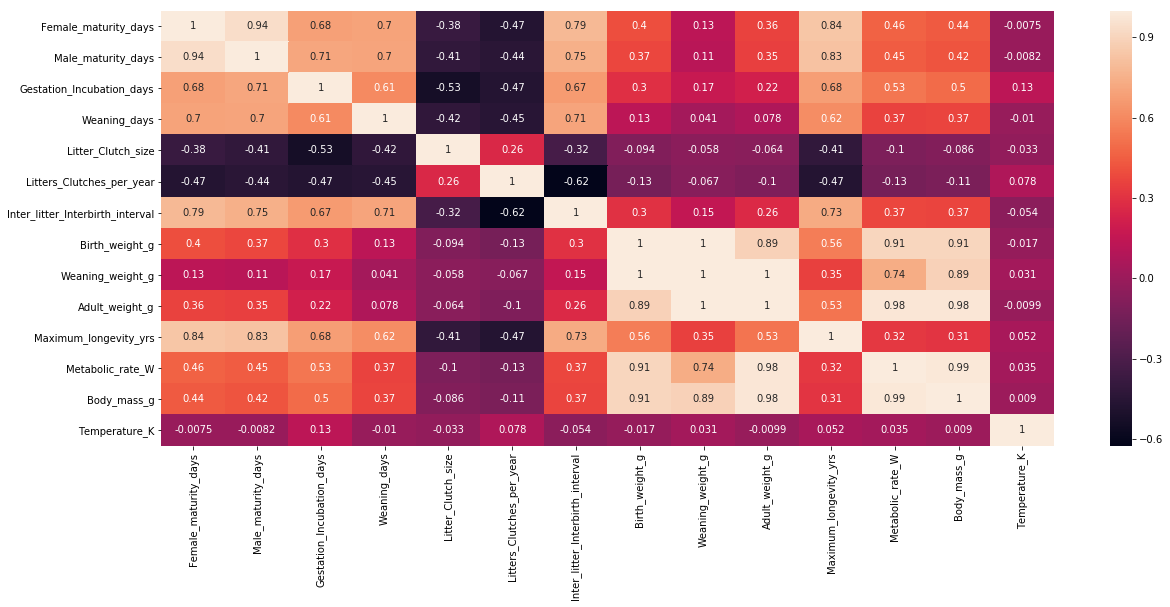

In [66]:
mam.drop(columns=['IMR_per_yr','MRDT_yrs','Growth_rate_1_days_'],inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(mam.corr(),annot=True)

In [67]:
mam.drop(columns=['Male_maturity_days','Body_mass_g','Weaning_weight_g','Metabolic_rate_W','Inter_litter_Interbirth_interval'],inplace=True)
mam.isnull().sum()
mam.shape
X=mam.dropna()
X.shape
Y=X.Order
X.drop(columns='Order',inplace=True)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 9), (61, 9), (182,), (61,))

In [69]:
model_DT=DecisionTreeClassifier()
model_RF=RandomForestClassifier()
model_GB=GradientBoostingClassifier()
model=[model_DT,model_RF,model_GB]

In [71]:
def accuracy_calculator(x_train,x_test,y_train,y_test,model):
    for i in range(len(model)):
        model[i].fit(x_train,y_train)
        print('model'+str(i)+' training accuracy: '+str(accuracy_score(model[i].predict(x_train),y_train)))
        print('model'+str(i)+' test accuracy: '+str(accuracy_score(model[i].predict(x_test),y_test)))

In [72]:
accuracy_calculator(x_train,x_test,y_train,y_test,model)

model0 training accuracy: 1.0
model0 test accuracy: 0.6721311475409836
model1 training accuracy: 0.978021978021978
model1 test accuracy: 0.6721311475409836
model2 training accuracy: 1.0
model2 test accuracy: 0.7049180327868853


In [73]:
model_GB.feature_importances_
x_train.columns
T1=zip(x_train.columns,model_GB.feature_importances_*100) 
list(T1)

[('Female_maturity_days', 7.797155431904278),
 ('Gestation_Incubation_days', 6.965080857917388),
 ('Weaning_days', 3.477281737421473),
 ('Litter_Clutch_size', 3.045404747186291),
 ('Litters_Clutches_per_year', 2.5981008130175587),
 ('Birth_weight_g', 9.889193570353921),
 ('Adult_weight_g', 6.615746480919974),
 ('Maximum_longevity_yrs', 10.165477976973342),
 ('Temperature_K', 7.73227267002006)]

In [74]:
st=StandardScaler()
x_train_st=st.fit_transform(x_train)
x_test_st=st.fit_transform(x_test)
model_MLP=MLPClassifier()
model_MLP.fit(x_train_st,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [75]:
accuracy_score(model_MLP.predict(x_train_st),y_train)

0.7692307692307693

In [76]:
accuracy_score(model_MLP.predict(x_test_st),y_test)


0.5573770491803278